In [1]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# read the csv data into a pandas dataframe and set the date as the index
# df = pd.read_csv('end-part2_df.csv').set_index('date')
with open('end-part1_df.pkl', 'rb') as fp:
    df = pickle.load(fp)

# execute the describe() function and transpose the output so that it doesn't overflow the width of the screen
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,987.0,20.187437,7.519975,-4.0,16.0,21.0,27.0,45.00
maxtempm,987.0,26.114488,8.184737,0.0,22.0,27.0,32.0,60.00
mintempm,987.0,14.628166,7.570530,-9.0,9.0,16.0,22.0,33.00
meantempm_1,987.0,20.191489,7.508940,-4.0,16.0,21.0,27.0,45.00
meantempm_2,987.0,20.178318,7.506226,-4.0,16.0,21.0,27.0,45.00
meantempm_3,987.0,20.164134,7.512087,-4.0,16.0,21.0,27.0,45.00
meandewptm_1,987.0,13.943262,8.448077,-13.0,8.0,16.0,21.0,32.00
meandewptm_2,987.0,13.924012,8.447745,-13.0,8.0,16.0,21.0,32.00
meandewptm_3,987.0,13.899696,8.454452,-13.0,8.0,16.0,21.0,32.00
meanpressurem_1,987.0,1017.081054,5.805984,1001.0,1013.0,1016.0,1020.0,1040.00


In [3]:
df.index = df.index.values.astype(float)

In [4]:
# execute the info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 987 entries, 1.444169586559948e+18 to 1.530144e+18
Data columns (total 39 columns):
meantempm          987 non-null float64
maxtempm           987 non-null float64
mintempm           987 non-null float64
meantempm_1        987 non-null float64
meantempm_2        987 non-null float64
meantempm_3        987 non-null float64
meandewptm_1       987 non-null float64
meandewptm_2       987 non-null float64
meandewptm_3       987 non-null float64
meanpressurem_1    987 non-null float64
meanpressurem_2    987 non-null float64
meanpressurem_3    987 non-null float64
maxhumidity_1      987 non-null float64
maxhumidity_2      987 non-null float64
maxhumidity_3      987 non-null float64
minhumidity_1      987 non-null float64
minhumidity_2      987 non-null float64
minhumidity_3      987 non-null float64
maxtempm_1         987 non-null float64
maxtempm_2         987 non-null float64
maxtempm_3         987 non-null float64
mintempm_1         987 n

In [5]:
# First drop the maxtempm and mintempm from the dataframe
df = df.drop(['mintempm', 'maxtempm'], axis=1)

# X will be a pandas dataframe of all columns except meantempm
X = df[[col for col in df.columns if col != 'meantempm']]

# y will be a pandas series of the meantempm
y = df['meantempm']

In [6]:
# split data into training set and a temporary set
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [7]:
# split the remaining 20% of data evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print('Training instances   {}, Training features   {}'.format(X_train.shape[0], X_train.shape[1]))
print('Validation instances {}, Validation features {}'.format(X_val.shape[0], X_val.shape[1]))
print('Testing instances    {}, Testing features    {}'.format(X_test.shape[0], X_test.shape[1]))

Training instances   789, Training features   36
Validation instances 99, Validation features 36
Testing instances    99, Testing features    36


In [8]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [9]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='C:\\Users\\michael\\tf_models\\tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\michael\\tf_models\\tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F49544F550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [10]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [11]:
evaluations = []
STEPS = 400
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 21998886.0, step = 1
INFO:tensorflow:global_step/sec: 29.1905
INFO:tensorflow:loss = 22112.188, step = 101 (3.433 sec)
INFO:tensorflow:global_step/sec: 32.3253
INFO:tensorflow:loss = 20667.355, step = 201 (3.070 sec)
INFO:tensorflow:global_step/sec: 33.459
INFO:tensorflow:loss = 19171.76, step = 301 (3.004 sec)
INFO:tensorflow:Saving checkpoints for 400 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 18292.746.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-07-22:33:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflo

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-07-22:35:44
INFO:tensorflow:Saving dict for global step 2400: average_loss = 16.215202, global_step = 2400, loss = 1605.305
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-2400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2401 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5811.361, step = 2401
INFO:tensorflow:global_step/sec: 32.8244
INFO:tensorflow:loss = 5489.0186, step = 2501 (3.047 sec)
INFO:tensorflow:global_step/sec: 36.1081
INFO:tensorflow:loss = 6617.869, step = 2601 (2.769 sec)
INFO:tensorflow:global_step/sec: 35.2241
INFO:tensorflow:loss = 5147.3

INFO:tensorflow:Saving checkpoints for 4800 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 5000.7544.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-07-22:38:12
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-4800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-07-22:38:13
INFO:tensorflow:Saving dict for global step 4800: average_loss = 10.634172, global_step = 4800, loss = 1052.7831
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-4800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_o

INFO:tensorflow:Saving checkpoints for 6801 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3849.835, step = 6801
INFO:tensorflow:global_step/sec: 34.2263
INFO:tensorflow:loss = 4775.284, step = 6901 (2.922 sec)
INFO:tensorflow:global_step/sec: 36.5724
INFO:tensorflow:loss = 4418.269, step = 7001 (2.734 sec)
INFO:tensorflow:global_step/sec: 36.7825
INFO:tensorflow:loss = 3832.1, step = 7101 (2.719 sec)
INFO:tensorflow:Saving checkpoints for 7200 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4709.398.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-07-22:40:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-7200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-07-22:40:38
INFO:ten

INFO:tensorflow:Saving dict for global step 9200: average_loss = 9.312781, global_step = 9200, loss = 921.96533
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-9200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 9201 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3804.8584, step = 9201
INFO:tensorflow:global_step/sec: 32.9895
INFO:tensorflow:loss = 4409.172, step = 9301 (3.047 sec)
INFO:tensorflow:global_step/sec: 35.9512
INFO:tensorflow:loss = 3851.9941, step = 9401 (2.766 sec)
INFO:tensorflow:global_step/sec: 35.8363
INFO:tensorflow:loss = 4141.8413, step = 9501 (2.790 sec)
INFO:tensorflow:Saving checkpoints for 9600 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorf

INFO:tensorflow:Loss for final step: 3340.2422.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-07-22:45:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-11600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-07-22:45:14
INFO:tensorflow:Saving dict for global step 11600: average_loss = 8.95492, global_step = 11600, loss = 886.53705
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-11600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 11601 into C:\Users\michael\tf_models\tf_wx_model\model.

INFO:tensorflow:loss = 3656.803, step = 13601
INFO:tensorflow:global_step/sec: 33.1249
INFO:tensorflow:loss = 3748.4604, step = 13701 (3.003 sec)
INFO:tensorflow:global_step/sec: 35.8591
INFO:tensorflow:loss = 3964.0513, step = 13801 (2.789 sec)
INFO:tensorflow:global_step/sec: 35.4416
INFO:tensorflow:loss = 3320.3787, step = 13901 (2.822 sec)
INFO:tensorflow:Saving checkpoints for 14000 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4005.8125.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-07-22:47:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-14000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-07-22:47:41
INFO:tensorflow:Saving dict for global step 14000: average_loss = 8.610703, global_step = 14000,

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-16000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 16001 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4286.9263, step = 16001
INFO:tensorflow:global_step/sec: 33.3344
INFO:tensorflow:loss = 3760.615, step = 16101 (3.000 sec)
INFO:tensorflow:global_step/sec: 36.1598
INFO:tensorflow:loss = 3464.7363, step = 16201 (2.766 sec)
INFO:tensorflow:global_step/sec: 36.5723
INFO:tensorflow:loss = 4313.6816, step = 16301 (2.734 sec)
INFO:tensorflow:Saving checkpoints for 16400 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3613.7139.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-07-22:52:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-18400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-07-22:52:12
INFO:tensorflow:Saving dict for global step 18400: average_loss = 8.437139, global_step = 18400, loss = 835.27673
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-18400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 18401 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4084.7153, step = 18401
INFO:tensorflow:global_step/

INFO:tensorflow:loss = 3747.4097, step = 20401
INFO:tensorflow:global_step/sec: 33.5541
INFO:tensorflow:loss = 3754.0784, step = 20501 (2.980 sec)
INFO:tensorflow:global_step/sec: 36.2984
INFO:tensorflow:loss = 3430.8955, step = 20601 (2.771 sec)
INFO:tensorflow:global_step/sec: 35.9022
INFO:tensorflow:loss = 3669.564, step = 20701 (2.785 sec)
INFO:tensorflow:Saving checkpoints for 20800 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3776.059.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-07-22:54:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-20800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-07-22:54:39
INFO:tensorflow:Saving dict for global step 20800: average_loss = 8.25113, global_step = 20800, l

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-22800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 22801 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4145.417, step = 22801
INFO:tensorflow:global_step/sec: 33.8628
INFO:tensorflow:loss = 4074.923, step = 22901 (2.969 sec)
INFO:tensorflow:global_step/sec: 36.3646
INFO:tensorflow:loss = 3754.0476, step = 23001 (2.750 sec)
INFO:tensorflow:global_step/sec: 36.5724
INFO:tensorflow:loss = 4163.7344, step = 23101 (2.734 sec)
INFO:tensorflow:Saving checkpoints for 23200 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3433.769.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-07-22:59:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-25200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-07-22:59:13
INFO:tensorflow:Saving dict for global step 25200: average_loss = 8.245125, global_step = 25200, loss = 816.2674
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-25200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 25201 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4501.505, step = 25201
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 32.7078
INFO:tensorflow:loss = 4569.269, step = 27301 (3.104 sec)
INFO:tensorflow:global_step/sec: 35.5746
INFO:tensorflow:loss = 4066.731, step = 27401 (2.780 sec)
INFO:tensorflow:global_step/sec: 34.8509
INFO:tensorflow:loss = 3649.778, step = 27501 (2.854 sec)
INFO:tensorflow:Saving checkpoints for 27600 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3833.1086.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-07-23:01:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-27600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-07-23:01:42
INFO:tensorflow:Saving dict for global step 27600: average_loss = 8.116675, global_step = 27600, loss = 803.55084
INFO:tensorflow:Calling model_f

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-29600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 29601 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3716.4458, step = 29601
INFO:tensorflow:global_step/sec: 29.4428
INFO:tensorflow:loss = 3872.0796, step = 29701 (3.396 sec)
INFO:tensorflow:global_step/sec: 32.9002
INFO:tensorflow:loss = 3482.3804, step = 29801 (3.024 sec)
INFO:tensorflow:global_step/sec: 34.7672
INFO:tensorflow:loss = 3094.4832, step = 29901 (2.892 sec)
INFO:tensorflow:Saving checkpoints for 30000 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4021.7666.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-07-23:06:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-32000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-07-23:06:15
INFO:tensorflow:Saving dict for global step 32000: average_loss = 7.7753386, global_step = 32000, loss = 769.75854
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-32000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 32001 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3717.6963, step =

INFO:tensorflow:loss = 3549.5225, step = 34001
INFO:tensorflow:global_step/sec: 32.852
INFO:tensorflow:loss = 3194.1035, step = 34101 (3.053 sec)
INFO:tensorflow:global_step/sec: 34.1819
INFO:tensorflow:loss = 3609.4578, step = 34201 (2.932 sec)
INFO:tensorflow:global_step/sec: 34.5417
INFO:tensorflow:loss = 3710.0679, step = 34301 (2.879 sec)
INFO:tensorflow:Saving checkpoints for 34400 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3635.2393.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-07-23:08:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-34400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-07-23:08:43
INFO:tensorflow:Saving dict for global step 34400: average_loss = 7.654252, global_step = 34400,

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-36400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 36401 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3606.3296, step = 36401
INFO:tensorflow:global_step/sec: 33.5088
INFO:tensorflow:loss = 3172.3809, step = 36501 (2.969 sec)
INFO:tensorflow:global_step/sec: 36.3645
INFO:tensorflow:loss = 3458.5527, step = 36601 (2.750 sec)
INFO:tensorflow:global_step/sec: 35.956
INFO:tensorflow:loss = 3635.6223, step = 36701 (2.781 sec)
INFO:tensorflow:Saving checkpoints for 36800 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3817.2764.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-07-23:13:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-38800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-07-23:13:10
INFO:tensorflow:Saving dict for global step 38800: average_loss = 7.5482583, global_step = 38800, loss = 747.2776
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-38800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 38801 into C:\Users\michael\tf_models\tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2963.5552, step = 

In [12]:
evaluations[0]

{'average_loss': 53.33547, 'loss': 5280.2114, 'global_step': 400}

In [13]:
evaluations[-1]

{'average_loss': 7.5324407, 'loss': 745.7116, 'global_step': 40000}

Text(0,0.5,'Loss (SSE)')

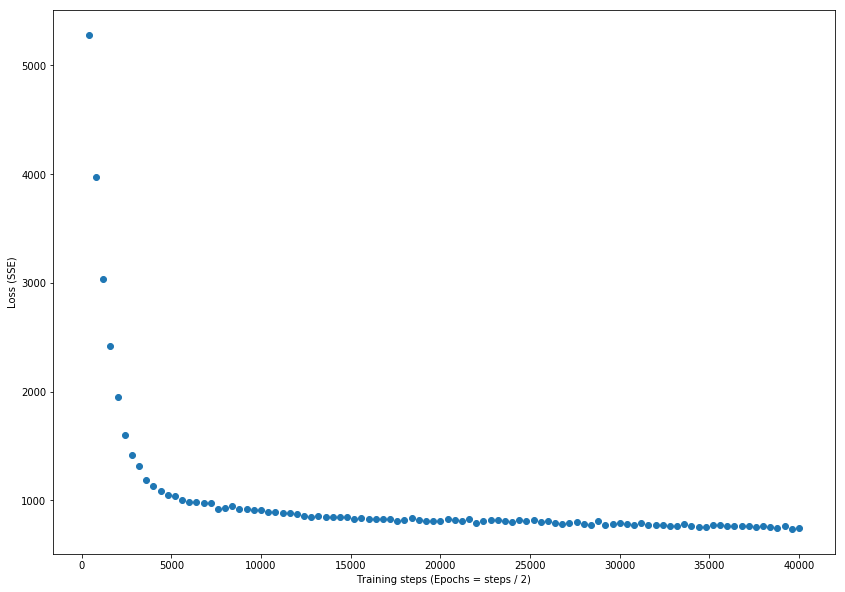

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(x=training_steps, y=loss_values)
ax.set_xlabel('Training steps (Epochs = steps / 2)')
ax.set_ylabel('Loss (SSE)')

In [16]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print('The Explained Variance: %.2f' % explained_variance_score(y_test, predictions))
print('The Mean Absolute Error: %.2f degrees Celcius' % mean_absolute_error(y_test, predictions))
print('The Median Absolute Error: %.2f degrees Celcius' % median_absolute_error(y_test, predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\michael\tf_models\tf_wx_model\model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.81
The Mean Absolute Error: 2.26 degrees Celcius
The Median Absolute Error: 1.42 degrees Celcius
